# Titanic Analysis



**Data Dictionary**  
**PassengerId**: Passenger identification number  
**Survived**: Survival. 0 = No, 1 = Yes  
**Pclass**: Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd  
**Name**: Passenger name  
**Sex**: Passenger sex  
**Age**: Passenger age in years  
**SibSp**: Number of siblings/spouses aboard Titanic  
**Parch**: Number of parents/children aboard Titanic  
**Ticket**: Ticket number  
**Fare**: Passenger fare  
**Cabin**: Cabin number  
**Embarked**: Port of Embarkation. C =Cherbourg, Q = Queenstown, S = Southampton

For more information on the data, consult the website https://www.kaggle.com/c/titanic

In [1]:
# import libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read data
titanic_df = pd.read_csv('train.csv')

# preview data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# let's see more information on our data
print(titanic_df.describe())
print(titanic_df.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

Initial observations show that the Cabin column is missing a significant amount of data. The Age column is also missing 173 entries.

## Initial exploration

Let us answer some basic questions

1. Who were the passengers?
   - Ages
   - Gender
   - Class
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers embark?
4. Who was alone and who was their family?

## Exploring Age, Sex, and Class

Text(0.5, 1, 'Sex Count')

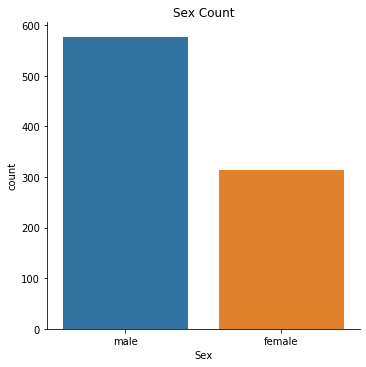

In [3]:
# let's see their sexes
sns.catplot(x='Sex',data=titanic_df, kind='count')
plt.title('Sex Count')

So their were nearly twice as many males than females aboard the Titanic.

Text(0.5, 20.80000000000002, 'Class')

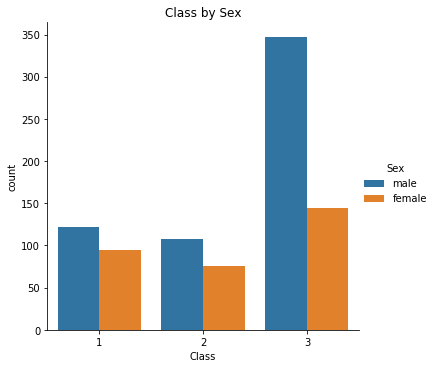

In [4]:
# let's split their sex by class
sns.catplot(x='Pclass', data=titanic_df, kind='count', hue='Sex')
plt.title('Class by Sex')
plt.xlabel('Class')

Most of the males were in 3rd class. What about children?

In [5]:
# We will create a function to find children passengers

def male_female_child(passenger):
    '''determines if a passenger is a child if their age is less than 16 years'''
    
    age,sex = passenger
    # compare the age, otherwise leave sex as is
    if age < 16:
        return 'child'
    else: 
        return sex

In [6]:
# Create a new column person using our new function 
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [7]:
# let's see if our function worked
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Now let's see how many children were aboard.

Text(0.5, 20.80000000000002, 'Class')

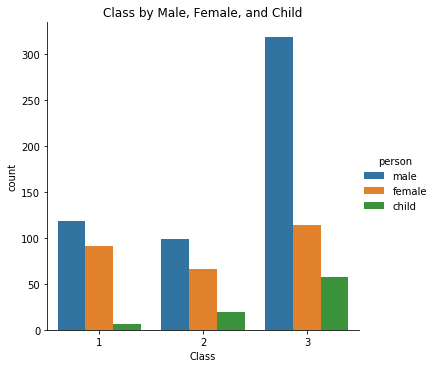

In [8]:
sns.catplot('Pclass',data=titanic_df, kind='count', hue='person')
plt.title('Class by Male, Female, and Child')
plt.xlabel('Class')

It appears that the vast majority of children were in third class and only a handful of children were in first class. 

Text(0.5, 0, 'Age in Years')

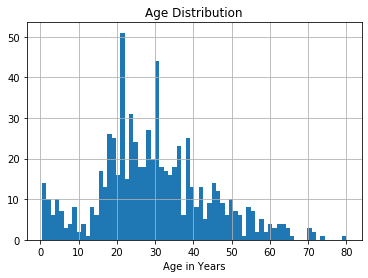

In [9]:
titanic_df['Age'].hist(bins=70)
plt.title('Age Distribution')
plt.xlabel('Age in Years')

In [10]:
# what was the average age?
titanic_df['Age'].mean()

29.69911764705882

In [11]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

Text(0.5, 1, 'Age vs Sex')

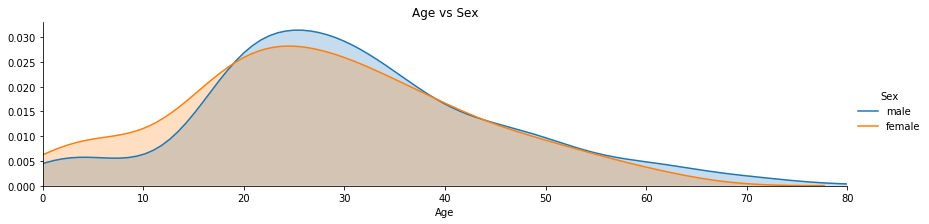

In [41]:
# use a kernel density estimate to better illustrate the age distributions

# use a facegrid to visualize multiple plots in one plot
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)

# use map to plot all possible kdeplots for 'Age' column
fig.map(sns.kdeplot, 'Age', shade=True)

# set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

# set the lower limit to 0
fig.set(xlim=(0,oldest))

fig.add_legend()
plt.title('Age vs Sex')

Text(0.5, 1, 'Age vs Person')

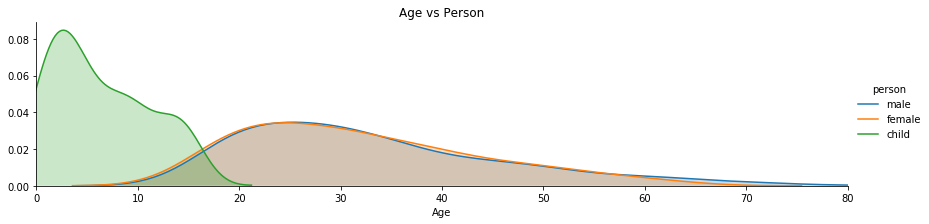

In [42]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()
plt.title('Age vs Person')

Text(0.5, 1, 'Age vs Class')

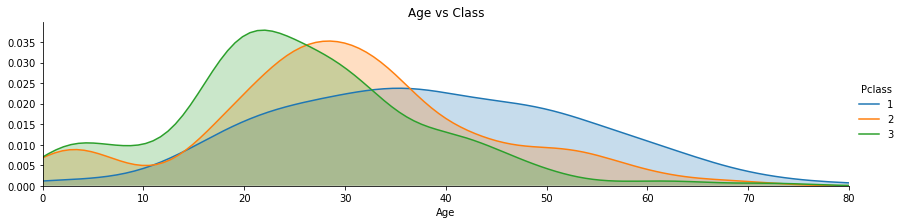

In [43]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()
plt.title('Age vs Class')

### Cabin column

The Cabin column contains a lot of NaN values. We will drop those rows to obtain cabin levels and visualize them. Note that only about 25% of the Cabin column contains non-null values. 

In [15]:
titanic_df['Cabin'].value_counts(dropna=False)

NaN            687
C23 C25 C27      4
B96 B98          4
G6               4
E101             3
              ... 
D30              1
B94              1
C54              1
D9               1
E68              1
Name: Cabin, Length: 148, dtype: int64

In [16]:
# drop null values in Cabin column
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

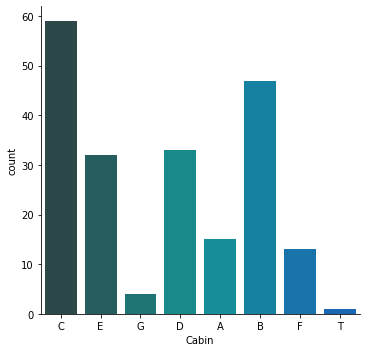

In [17]:
# use a for loop to obtain the letter indicating the cabin levels and append to levels list
levels = []
for level in deck:
    levels.append(level[0])

# create a dataframe for cabin levels and plot them
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin', data=cabin_df, palette='winter_d', kind='count')

The T level doesn't make sense so we will take that out of our data and plot again.

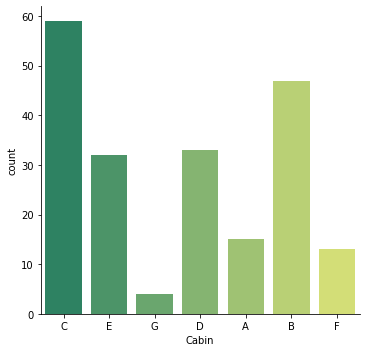

In [18]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.catplot('Cabin', data=cabin_df, palette='summer', kind='count')

## Embarked Column: Where did they come from?

- C = Cherbourg  
- Q = Queenstown  
- S = Southampton  

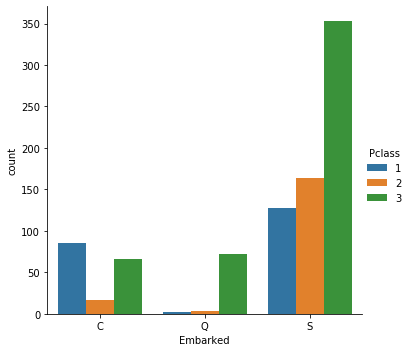

In [19]:
sns.catplot('Embarked', data=titanic_df, kind='count', hue='Pclass', order=['C','Q','S'])

Who was alone and who was with family?

In [20]:
#let's define what alone means
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


We will use the SibSp and Parch columns to define our new alone column. We will define alone to be where both columns have a 0 entry.

In [24]:
# create alone column by adding the two columns
titanic_df['alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df.alone.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: alone, dtype: int64

Anything greater than 0 means that the passenger had family aboard. We will now change the entries to indicate if the passenger had family aboard or if they were alone.

In [25]:
titanic_df['alone'].loc[titanic_df['alone'] > 0] = 'With Family'
titanic_df['alone'].loc[titanic_df['alone'] == 0] = 'Alone'

titanic_df.head()

C:\Users\irama\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


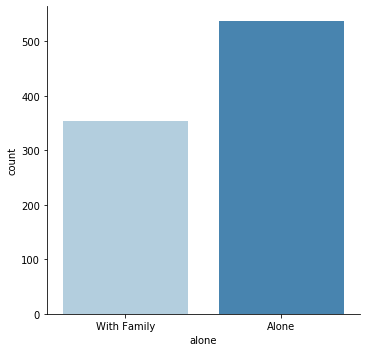

In [27]:
sns.catplot('alone', data=titanic_df, palette='Blues', kind='count')

## Exploring survival

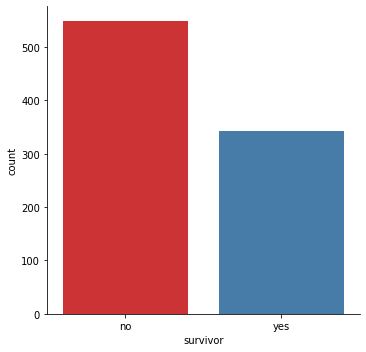

In [29]:
titanic_df['survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

sns.catplot('survivor', data=titanic_df, kind='count', palette='Set1')

Text(0, 0.5, 'Survival Rate')

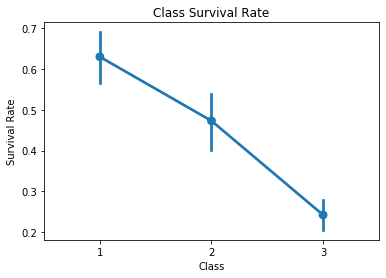

In [32]:
sns.pointplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Class Survival Rate')
plt.xlabel('Class')
plt.ylabel('Survival Rate')

This low survival rate for the third class could be expected since the majority of males were in the third class, but let us keep exploring. Let's  see how introducing gender changes things.

Text(0, 0.5, 'Survival Rate')

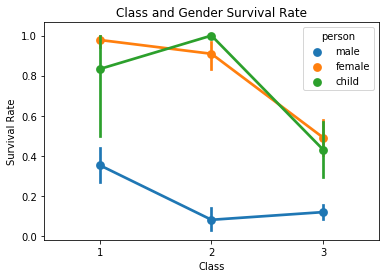

In [34]:
sns.pointplot(x='Pclass', y='Survived', hue='person', data=titanic_df)
plt.title('Class and Gender Survival Rate')
plt.xlabel('Class')
plt.ylabel('Survival Rate')

It is clear that being in third class was not a favorable position to be in. Survival rate was especially low for males across all classes. N

Now we will see if age played a role in survival.

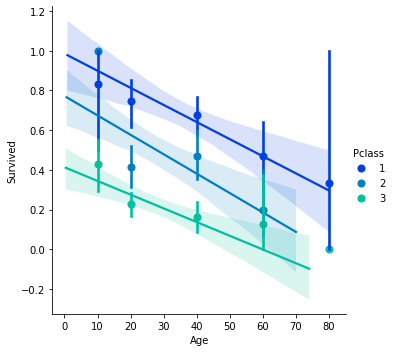

In [39]:
generations = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Pclass', palette='winter', x_bins=generations)

The general trend indicates that survival rate goes down with increasing age. As expected, survival rate also goes down with class. 

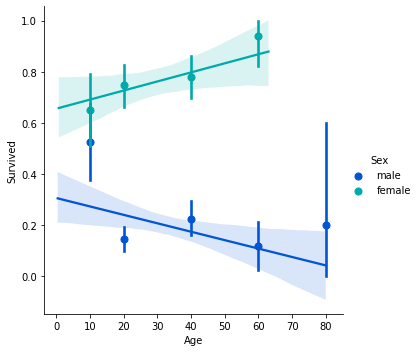

In [40]:
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Sex', palette='winter', x_bins=generations)

As we expected, male surivial rate decreased with age. Interestingly, female survival increased with age. 

## Family survival rate

Did having family aboard increase your survival rate?

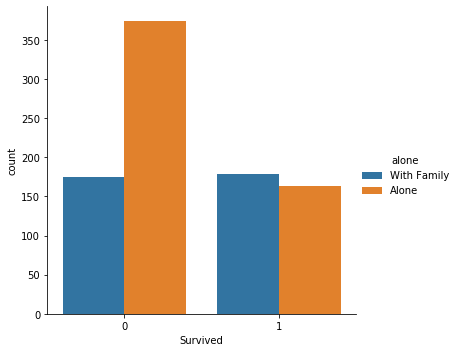

In [51]:
sns.catplot('Survived', data=titanic_df, kind='count', hue='alone')

From this we can see that most of those that were alone died, but whether having family increasing your survival rate remains inconclusive. Let's keep digging.

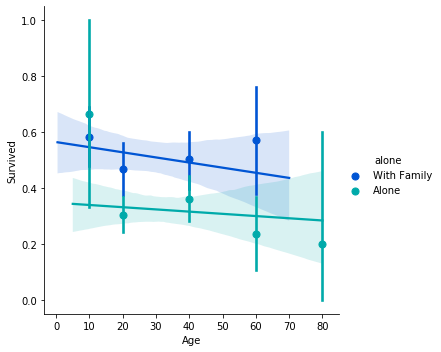

In [52]:
sns.lmplot('Age', 'Survived', data=titanic_df, hue='alone', palette='winter', x_bins=generations)

This indicates that passengers with family had a higher survival rate than those that were alone, but with large standard deviations with generations.

Text(0, 0.5, 'Survival Rate')

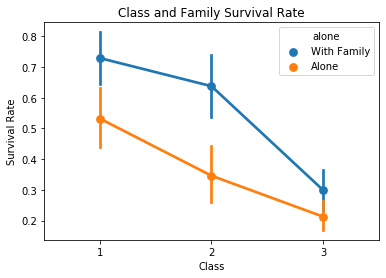

In [53]:
sns.pointplot(x='Pclass', y='Survived', hue='alone', data=titanic_df)
plt.title('Class and Family Survival Rate')
plt.xlabel('Class')
plt.ylabel('Survival Rate')

With this we can confirm our intuition that those travelling alone had a lower survival rate than those travelling with family.